# Summary:
---

1. This notebook is a workspace for general scratchwork

### Read Files

In [1]:
import pandas as pd
from Bio import SeqIO

In [2]:
# parse attempt 2 from dataParsing notebook
def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])

    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

In [131]:
virus1 = parseFasta("data/Sclerotinia_biocontrol_mycovirus_nucleotide.fasta")
virus1

,Sequence
ID,
NC_007415.1,CTTTAGTAAATACCACCGCCTCTTAATAAGTCTCGAGGCACTCCCC...
NC_015939.1,GGGGTGATGGGAAACTTACGTTTCGCCAACGTTAAGGTACTGTGAT...
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...
NC_027139.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...
NC_025383.1,AGGGAGTATTATAATTACCTTCGTAGTTGTTCTTACTCTCTGGTAC...


In [236]:
virus01 = parseFasta("data/mycovirus_genbank_all_refseq_nucleotide_unique.fasta")

In [237]:
# put confirmed virus killers at bottom, and removed the duplicates already in the data
virus01 = virus01.append(virus1)
virus01 = virus01.drop_duplicates(keep="last")
virus01

,Sequence
ID,
NC_000960.1,GGGGGTTAGAGAAATCTTGGGAGATTTCTATCGTCATAGACATATG...
NC_001278.1,GGGAAATTTGTGAGATTATCGCCCTAAAGGATAACTCTCATGCGGG...
NC_001492.1,GCCTATGGGTGGTCTACATAGGTGAGCATGCGTTGCTCGATATAGA...
NC_001633.1,ACAAAATAATTGAAGAAATTATTTTTGTTTTACATATTTAGATCTT...
NC_001641.1,GAATTTTTCGGTGAACCGGAATTATGTCGTCTCTGTTAAATTCATT...
...,...
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...


### Make KMER Table

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:
# testing
tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(1,2))
s_hat = tfid_vector.fit_transform(virus1.Sequence)
kmers = s_hat.toarray()
kmerNames = count_vect.get_feature_names()

In [173]:
# kmer table with kmers of length a to b
def kmerXTable(s, a, b):
    tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(a,b))
    s_hat = tfid_vector.fit_transform(s.Sequence)
    kmerNames = tfid_vector.get_feature_names()
    kmers = s_hat.toarray()
    return pd.DataFrame(kmers,columns=kmerNames, index = s.index)

In [239]:
kmer7Table1 = kmerXTable(virus1, 7,7)
kmer7Table1

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.413798,0.000000,0.00000,0.000000,0.000000,0.009196,0.012391,0.018391,0.000000,0.000000,...,0.000000,0.000000,0.018391,0.024782,0.000000,0.009196,0.000000,0.009196,0.024782,0.021183
NC_015939.1,0.219900,0.008231,0.00000,0.014071,0.005351,0.000000,0.000000,0.012217,0.006108,0.000000,...,0.000000,0.008231,0.000000,0.000000,0.012217,0.012217,0.007036,0.000000,0.000000,0.000000
NC_022896.1,0.120535,0.000000,0.00000,0.000000,0.000000,0.009643,0.006497,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014464,0.009643,0.005553,0.000000,0.006497,0.000000
NC_026510.1,0.000000,0.000000,0.00000,0.000000,0.014261,0.000000,0.000000,0.000000,0.016280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.00000,0.000000,0.007853,0.008964,0.000000,0.008964,0.000000,0.012080,...,0.000000,0.000000,0.008964,0.012080,0.000000,0.000000,0.000000,0.008964,0.000000,0.000000
NC_027139.1,0.000000,0.000000,0.01534,0.010884,0.008278,0.018900,0.000000,0.000000,0.018900,0.012734,...,0.000000,0.000000,0.009450,0.000000,0.009450,0.000000,0.000000,0.009450,0.000000,0.010884
NC_025383.1,0.006236,0.008403,0.00000,0.028731,0.021851,0.000000,0.000000,0.012472,0.018708,0.000000,...,0.010123,0.008403,0.012472,0.000000,0.006236,0.012472,0.014365,0.012472,0.000000,0.007183


In [241]:
kmer27Table1 = kmerXTable(virus1, 2,7)

In [240]:
kmer7Table01 = kmerXTable(virus01, 7,7)

In [215]:
kmer27Table01 = kmerXTable(virus01, 2,7)

### Find importance of KMERs

In [33]:
# all columns that contain zeros for virus1
kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) == True]

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.413798,0.000000,0.00000,0.000000,0.000000,0.009196,0.012391,0.018391,0.000000,0.000000,...,0.000000,0.000000,0.018391,0.024782,0.000000,0.009196,0.000000,0.009196,0.024782,0.021183
NC_015939.1,0.219900,0.008231,0.00000,0.014071,0.005351,0.000000,0.000000,0.012217,0.006108,0.000000,...,0.000000,0.008231,0.000000,0.000000,0.012217,0.012217,0.007036,0.000000,0.000000,0.000000
NC_022896.1,0.120535,0.000000,0.00000,0.000000,0.000000,0.009643,0.006497,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014464,0.009643,0.005553,0.000000,0.006497,0.000000
NC_026510.1,0.000000,0.000000,0.00000,0.000000,0.014261,0.000000,0.000000,0.000000,0.016280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.00000,0.000000,0.007853,0.008964,0.000000,0.008964,0.000000,0.012080,...,0.000000,0.000000,0.008964,0.012080,0.000000,0.000000,0.000000,0.008964,0.000000,0.000000
NC_027139.1,0.000000,0.000000,0.01534,0.010884,0.008278,0.018900,0.000000,0.000000,0.018900,0.012734,...,0.000000,0.000000,0.009450,0.000000,0.009450,0.000000,0.000000,0.009450,0.000000,0.010884
NC_025383.1,0.006236,0.008403,0.00000,0.028731,0.021851,0.000000,0.000000,0.012472,0.018708,0.000000,...,0.010123,0.008403,0.012472,0.000000,0.006236,0.012472,0.014365,0.012472,0.000000,0.007183


In [251]:
# all columns that do not contain any zeros for virus1
kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True]

,aaaacaa,aactttt,aagatga,aatcaaa,acaaata,agaagaa,agatttc,aggaatt,aggagat,aggttga,...,tcaagga,tcacaag,tcttgga,tggaaag,tggaatt,ttcaaag,ttctttc,ttgaaga,ttggaaa,ttttgat
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.012511,0.006255,0.018766,0.012511,0.006255,0.006255,0.006255,0.006255,0.006255,0.006255,...,0.012511,0.012511,0.006255,0.012511,0.006255,0.006255,0.006255,0.012511,0.012511,0.018766
NC_015939.1,0.008311,0.004155,0.008311,0.012466,0.004155,0.024932,0.004155,0.008311,0.008311,0.004155,...,0.008311,0.004155,0.004155,0.004155,0.004155,0.004155,0.008311,0.004155,0.004155,0.016621
NC_022896.1,0.003280,0.013119,0.013119,0.003280,0.003280,0.013119,0.003280,0.009840,0.006560,0.003280,...,0.009840,0.009840,0.013119,0.009840,0.006560,0.019679,0.006560,0.016399,0.003280,0.013119
NC_026510.1,0.011075,0.022150,0.022150,0.011075,0.011075,0.011075,0.011075,0.011075,0.011075,0.011075,...,0.011075,0.011075,0.011075,0.011075,0.011075,0.022150,0.011075,0.022150,0.011075,0.011075
NC_027138.1,0.012197,0.006098,0.018295,0.018295,0.012197,0.012197,0.006098,0.012197,0.006098,0.006098,...,0.006098,0.006098,0.006098,0.006098,0.006098,0.012197,0.006098,0.012197,0.012197,0.006098
NC_027139.1,0.019285,0.006428,0.006428,0.006428,0.019285,0.012857,0.006428,0.006428,0.006428,0.006428,...,0.006428,0.006428,0.012857,0.006428,0.006428,0.012857,0.006428,0.038570,0.006428,0.012857
NC_025383.1,0.021211,0.004242,0.008484,0.004242,0.004242,0.016969,0.008484,0.008484,0.029696,0.004242,...,0.004242,0.004242,0.004242,0.004242,0.008484,0.008484,0.004242,0.008484,0.004242,0.004242


In [61]:
#kmer7TableNonZero1 = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True]
#kmer7TableNonZero1.hist()

In [195]:
# labels for virus01
labels = [0 for x in range(343)] + [1 for x in range(7)]

## Models
-----

### Unsupervised:

Only the 1 labels are known, everything else is unknown, so I'm attempting to find clusters in the data in which all the 1 labels reside

#### KMeans (try 1)

In [263]:
from sklearn.cluster import KMeans
km1 = KMeans(random_state = 42, n_clusters = 2)
km1.fit(kmer27Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [278]:
# last 7 numbers in array are clusters for virus killers. We want these to all be the same
y_hat = km1.predict(kmer27Table01)
y_hat[343:]

array([0, 0, 1, 0, 1, 1, 0])

In [217]:
print(len(kmer27Table01.columns))
print(len(kmer7Table01.columns))

22789
16641


In [233]:
# Visulization attempt

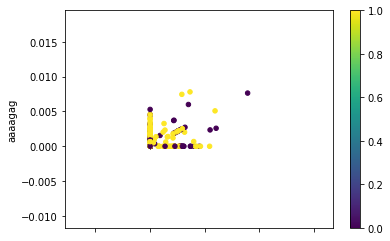

In [258]:
# KMeans labels
kmer27Table01.plot.scatter(x=7, y=49, c=y_hat, cmap="viridis")

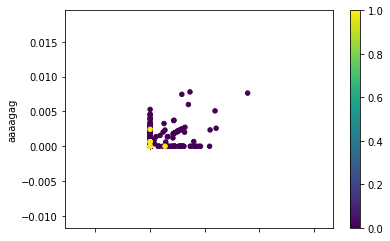

In [259]:
# actual labels
kmer27Table01.plot.scatter(x=7, y=49, c=labels, cmap="viridis")

#### KMeans (try 2)

In [267]:
from sklearn.cluster import KMeans
km2 = KMeans(random_state = 42, n_clusters = 2)
# only use columns that confirmed virus killers have no zeros in and kmer legnths 2 t 7
cols = kmer27Table1.loc[:, (kmer27Table1 == 0).any(axis=0) != True].columns
km2.fit(kmer27Table01[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [269]:
# last 7 numbers in array are clusters for virus killers
y_hat = km2.predict(kmer27Table01[cols])
y_hat[343:]

array([0, 0, 1, 0, 1, 1, 0])

#### KMeans (try 3)

In [270]:
from sklearn.cluster import KMeans
km3 = KMeans(random_state = 42, n_clusters = 2)
# only use kmers of length 7
km3.fit(kmer7Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [271]:
# last 7 numbers in array are clusters for virus killers
y_hat = km3.predict(kmer7Table01)
y_hat[343:]

array([1, 1, 1, 1, 0, 0, 1])

#### KMeans (try 4) best!

In [272]:
from sklearn.cluster import KMeans
km4 = KMeans(random_state = 42, n_clusters = 2)
# only use columns that confirmed virus killers have no zeros in for kmer length 7
cols = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True].columns
km4.fit(kmer7Table01[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [274]:
# last 7 numbers in array are clusters for virus killers
y_hat = km4.predict(kmer7Table01[cols])
y_hat[343:]

array([1, 1, 1, 1, 1, 1, 1])

In [275]:
y_hat

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [282]:
print(len(kmer7Table01[cols].columns))

34


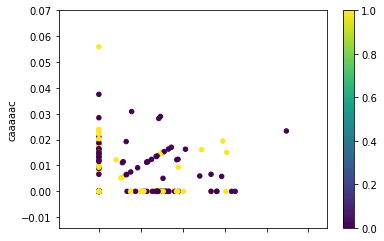

In [285]:
# KMeans labels
kmer7Table01[cols].plot.scatter(x=4, y=12, c=y_hat, cmap="viridis")

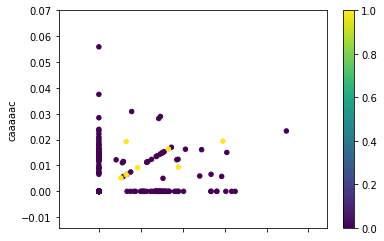

In [286]:
# actual labels
kmer7Table01[cols].plot.scatter(x=4, y=12, c=labels, cmap="viridis")

#### PCA

In [211]:
from sklearn.decomposition import PCA
embedding = PCA()
embedding.fit(kmer27Table01)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [212]:
dimensions = pd.Index(range(1,embedding.n_components_ + 1), name="dimensions")
dimensions_ratio = pd.Series(embedding.explained_variance_ratio_, index=dims)
dimensions_ratio.head()

dimensions
1    0.348472
2    0.127270
3    0.049630
4    0.037235
5    0.034573
dtype: float64

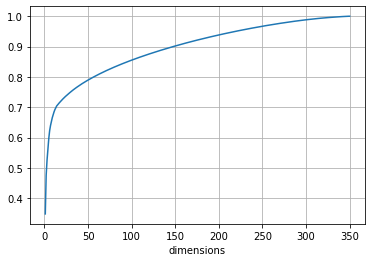

In [223]:
# Importance of each dimension
dimensions_ratio.cumsum().plot(grid=True)

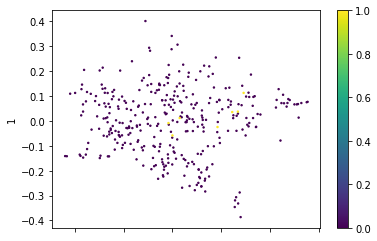

In [221]:
# Plotting the two most important dimensions against each other
import matplotlib.pyplot as plt

show = pd.DataFrame(embedding.transform(kmer27Table01))
show.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)